In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = r"https://huggingface.co/datasets/imodels/credit-card/raw/main/train.csv"
df = pd.read_csv(url)
df.head()

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,education:2,education:3,education:4,education:5,education:6,marriage:0,marriage:1,marriage:2,marriage:3,default.payment.next.month
0,80000.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,75125.0,77353.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,30000.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,29242.0,29507.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,180000.0,44.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,20916.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,60000.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,58839.0,53235.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,130000.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,111587.0,112348.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [3]:
df.info()
df["default.payment.next.month"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_bal                   24000 non-null  float64
 1   age                         24000 non-null  float64
 2   pay_0                       24000 non-null  float64
 3   pay_2                       24000 non-null  float64
 4   pay_3                       24000 non-null  float64
 5   pay_4                       24000 non-null  float64
 6   pay_5                       24000 non-null  float64
 7   pay_6                       24000 non-null  float64
 8   bill_amt1                   24000 non-null  float64
 9   bill_amt2                   24000 non-null  float64
 10  bill_amt3                   24000 non-null  float64
 11  bill_amt4                   24000 non-null  float64
 12  bill_amt5                   24000 non-null  float64
 13  bill_amt6                   240

0    18677
1     5323
Name: default.payment.next.month, dtype: int64

<AxesSubplot: >

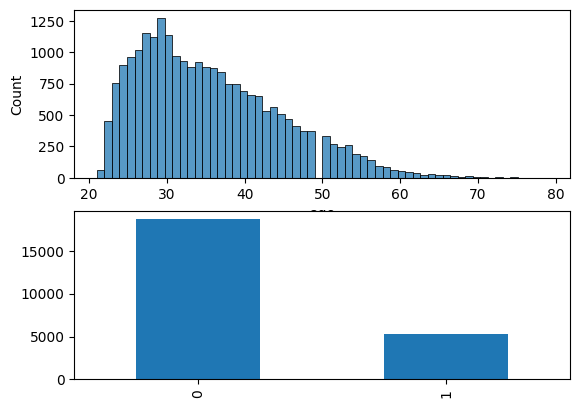

In [4]:
fig, axes = plt.subplots(2, squeeze=False)
sns.histplot(df["age"], ax = axes[0,0])
df["default.payment.next.month"].value_counts().plot(ax = axes[1,0], kind="bar") 


<AxesSubplot: xlabel='limit_bal', ylabel='Count'>

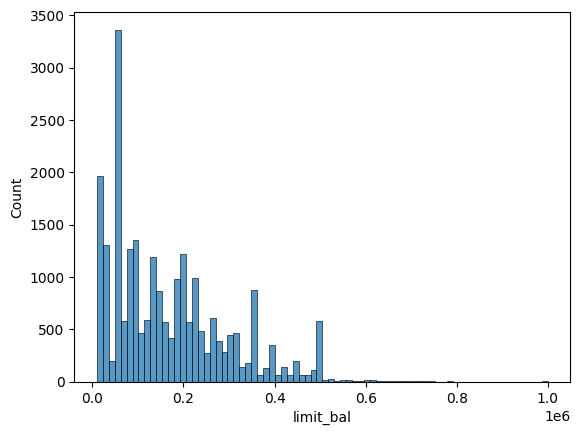

In [5]:
sns.histplot(df["limit_bal"])

C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


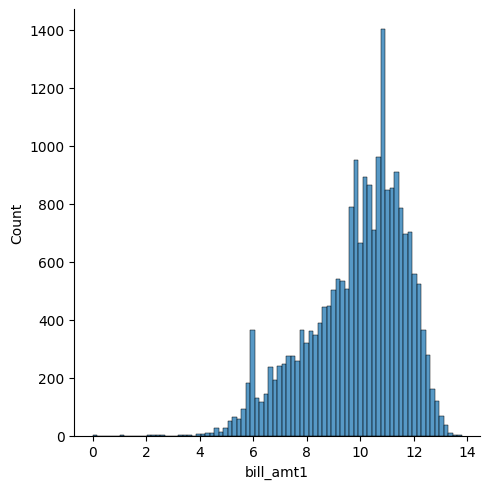

In [25]:
sns.displot(df["bill_amt1"])

In [7]:
df["bill_amt1"].describe()

count     24000.000000
mean      50927.468417
std       73400.840274
min     -165580.000000
25%        3537.000000
50%       22321.500000
75%       66377.000000
max      964511.000000
Name: bill_amt1, dtype: float64

In [14]:
X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
model.fit(X, y)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [17]:
test_ = "https://huggingface.co/datasets/imodels/credit-card/raw/main/test.csv"
df_test = pd.read_csv(test_)
X_test = df_test.drop("default.payment.next.month", axis=1)
y_test = df_test["default.payment.next.month"]

In [21]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

0.726

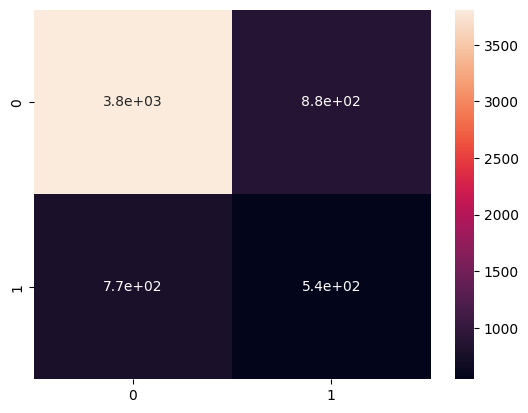

In [22]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
accuracy_score(y_pred, y_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.42      0.40      1313

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000

